## Working with HTML

In [62]:
import urllib.request
aliceUrl = "http://www.gutenberg.org/files/11/11-h/11-h.htm"
aliceString = urllib.request.urlopen(aliceUrl).read()

In [63]:
print(aliceString[:200]," ... ",aliceString[-200:]) # have a peek

b'<?xml version="1.0" encoding="us-ascii"?>\r\n\r\n<!DOCTYPE html\r\n   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >\r\n\r\n<html xmlns="http://www.w3.org/19'  ...  b'ons to the Project Gutenberg Literary\r\nArchive Foundation, how to help produce our new eBooks, and how to\r\nsubscribe to our email newsletter to hear about new eBooks.\r\n\r\n\r\n</pre>\r\n  </body>\r\n</html>\r\n'


In [64]:
from bs4 import BeautifulSoup
aliceSoup = BeautifulSoup(aliceString)
aliceSoupText = aliceSoup.text # this includes the head section
print(aliceSoupText[:200]," ... ",aliceSoupText[-200:]) # have a peek





      Alice's Adventures in Wonderland, by Lewis Carroll
    

    <!--
    body { margin:5%; background:#faebd0; text-align:justify}
    P { text-indent: 1em; margin-top: .25em; margin-botto  ...   have answered three questions, and that is enough,'
    Said his father; 'don't give yourself airs!
   Do you think I can listen all day to such stuff?
    Be off, or I'll kick you down stairs!'



In [65]:
aliceSoupBodyText = aliceSoup.body.text
print(aliceSoupBodyText[:200]," ... ",aliceSoupBodyText[-200:]) # have a peek




Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, gi  ...   have answered three questions, and that is enough,'
    Said his father; 'don't give yourself airs!
   Do you think I can listen all day to such stuff?
    Be off, or I'll kick you down stairs!'



## Working With XML

In [66]:
import nltk
rjFile = nltk.data.find("corpora/shakespeare/r_and_j.xml") # search for this text
rjFile

FileSystemPathPointer('/Users/sgs/nltk_data/corpora/shakespeare/r_and_j.xml')

In [67]:
from xml.etree.ElementTree import ElementTree
rjXml = ElementTree().parse(rjFile) # parse the file
rjXml

<Element 'PLAY' at 0x10e37b318>

In [68]:
speeches = rjXml.findall(".//SPEECH")
len(speeches)

841

In [69]:
speakers = rjXml.findall(".//SPEAKER")
len(speeches) # same thing, each speech has a speaker tag

841

In [70]:
speakerNames = [speaker.text for speaker in speakers]

In [71]:
print(set(speakerNames)) # unique speakers

{'Second Watchman', 'Apothecary', 'FRIAR LAURENCE', 'TYBALT', 'LADY MONTAGUE', 'MONTAGUE', 'ABRAHAM', 'CAPULET', 'JULIET', 'PAGE', 'FRIAR JOHN', 'GREGORY', 'Nurse', 'Servant', 'First Watchman', 'BENVOLIO', 'First Musician', 'Second Musician', 'PRINCE', None, 'Second Servant', 'LADY CAPULET', 'Musician', 'PETER', 'First Citizen', 'MERCUTIO', 'SAMPSON', 'NURSE', 'Third Musician', 'Third Watchman', 'LADY  CAPULET', 'BALTHASAR', 'Chorus', 'PARIS', 'ROMEO', 'Second Capulet', 'First Servant'}


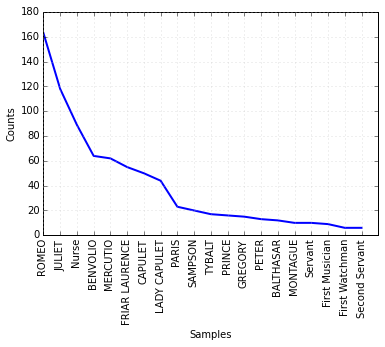

In [72]:
%matplotlib inline
nltk.FreqDist(speakerNames).plot(20) # how many speeches for each speaker

['Second Watchman', 'Apothecary', 'FRIAR LAURENCE', 'TYBALT', 'LADY MONTAGUE', 'MONTAGUE', 'ABRAHAM', 'CAPULET', 'JULIET', 'PAGE', 'FRIAR JOHN', 'GREGORY', 'Nurse', 'Servant', 'First Watchman', 'BENVOLIO', 'First Musician', 'Second Musician', 'PRINCE', None, 'Second Servant', 'LADY CAPULET', 'Musician', 'PETER', 'First Citizen', 'MERCUTIO', 'SAMPSON', 'NURSE', 'Third Musician', 'Third Watchman', 'LADY  CAPULET', 'BALTHASAR', 'Chorus', 'PARIS', 'ROMEO', 'Second Capulet', 'First Servant']


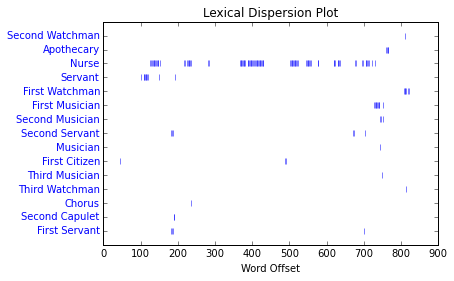

In [73]:
uniqueSpeakerNames = list(set(speakerNames))
print(uniqueSpeakerNames)
# let's look at names that aren't the non-string None and aren't all uppercase
titleCaseSpeakerNames = [name for name in uniqueSpeakerNames if name != None and name != name.upper()]
nltk.Text(speakerNames).dispersion_plot(titleCaseSpeakerNames)

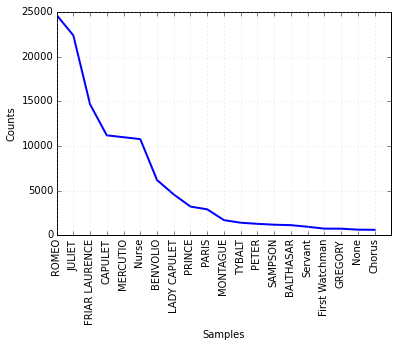

In [74]:
# let's create a dictionary with each speaker pointing to text from that speaker
speakersDict = nltk.defaultdict(str)
speeches = rjXml.findall(".//SPEECH")
for speech in speeches:
    speaker = speech.find("SPEAKER").text
    for line in speech.findall("LINE"):
        if line.text:
            speakersDict[speaker]+=line.text+"\n"

# now let's look at speech length for each speaker (different from number of speeches)
speakersLengthsDict = {}
for speaker, text in speakersDict.items():
    speakersLengthsDict[speaker]=len(text)

nltk.FreqDist(speakersLengthsDict).plot(20)

In [75]:
# let's look at how often Romeo and Juliet say "love" and which words are nearby
romeoTokens = nltk.word_tokenize(speakersDict["ROMEO"])
print(romeoTokens.count("love")/len(romeoTokens))
nltk.Text(romeoTokens).similar("love")
julietTokens = nltk.word_tokenize(speakersDict["JULIET"])
print(julietTokens.count("love")/len(julietTokens))
nltk.Text(julietTokens).similar("love")

0.008548499651081646
tell but charge come kinsman beseech crave behalf show little leave
sick she take open bury do need make cram
0.0062146892655367235
he tell thing idolatry repose cousin lord there behold more father
extremes heart nurse world it tomb bones romeo
